In [39]:
import pandas as pd

data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\prostate.csv')
data.shape

(97, 9)

In [41]:
x = data[['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']].values
y = data['lpsa'].values

is_train = data['svi'] == 0

x_train, y_train = x[is_train], y[is_train]
x_test, y_test = x[~is_train], y[~is_train]

print(x_train.shape, x_test.shape)

(76, 7) (21, 7)


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_regressor = Lasso(alpha=0.01)

lasso_regressor.fit(x_train_scaled, y_train)

y_pred = lasso_regressor.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


MSE: 1.341715061702692
MAE: 0.9555410165598384
R2: -0.6460791968010748


Toy dataset creation

In [65]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

random_seed = 42
np.random.seed(random_seed)

x = np.random.uniform(low=1, high=10, size=(100, 1))
#y = x * 2
y = x * 2+np.random.normal(loc=0,scale=2,size=(100, 1))

data = pd.DataFrame({'Input': x.flatten(), 'Output': y.flatten()})
data = shuffle(data, random_state=random_seed)
data.to_csv('toy_dataset_1.csv', index=False)

In [66]:
import pandas as pd

data = pd.read_csv('toy_dataset_1.csv')
data.shape

(100, 2)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = data[['Input']].values
y = data['Output'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

regressor = LinearRegression()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)




MSE: 2.659430857821965
MAE: 1.2846889872569867
R2: 0.9106885164663922


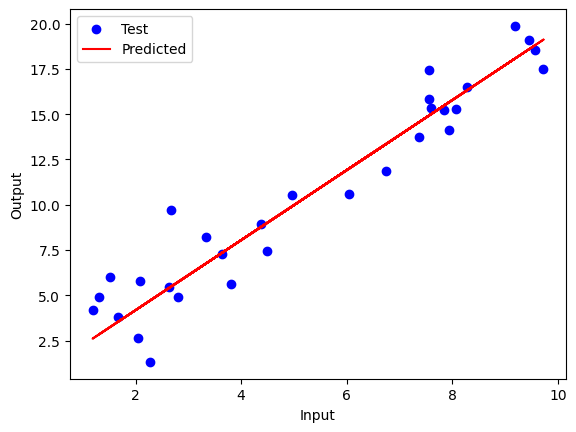

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color='blue',label='Test')
plt.plot(x_test,y_pred,color='red',label='Predicted')
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()